<a href="https://colab.research.google.com/github/Ototex2811/Ototex2811/blob/main/aia_project_meta_model_approach_servir_sco_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Meta Model approach


In [1]:
import ee
import geemap
ee.Authenticate()
ee.Initialize(project = 'ee-kingso4heaven')
Map = geemap.Map()

In [2]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 35.8 MB/s eta 0:00:00


In [3]:
!pip install shap

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import tensorflow as tf
from tensorflow.keras import layers, models

import re
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn import tree
import shap

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools

from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from osgeo import gdal, osr, ogr
import cv2
import os
import rasterio
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier


from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.ensemble import StackingRegressor

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import TimeSeriesSplit

from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from subprocess import check_output


from sklearn.inspection import permutation_importance
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


from mlxtend.evaluate import cochrans_q
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar



In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
%cd /content/drive/MyDrive/AIA_Project_Folder/
# /content/drive/MyDrive/sample_partition
!ls

/content/drive/.shortcut-targets-by-id/1FXrX8RSmUZkrcbgK8u7ne6Km5dnjuznJ/AIA_Project_Folder
 10_14_Project_Concept_Presentation.gslides   testing_9months.csv
 AIA_Project_workflow.gdraw		      testing_9months_fix.csv
 cropland_binary.tif			      training_9months.csv
 Final_Presentation.gslides		      training_9months_fix.csv
 LandsatComposite_2022.tif		      validation_9months.csv
 mosaic_output.tif			      validation_9months_fix.csv
'Project Concept.gdoc'			      Wheat_2023_Groundtruth.csv
 Project_Timeline.gsheet		      Wheat_testing.csv
 stackedResampled.tif			      Wheat_training.csv
 Stack_Reasmpled_10_16.tif		      Wheat_validation.csv


# Data handeling

In [7]:
train=pd.read_csv("training_9months_fix.csv") #Wheat_training
print("Train dataset has {} samples and {} attributes".format(*train.shape))

train_copy = train.copy()
train_copy


Train dataset has 1000 samples and 316 attributes


,system:index,MNDWI_HLS_01,MNDWI_HLS_02,MNDWI_HLS_03,MNDWI_HLS_04,MNDWI_HLS_05,MNDWI_HLS_06,MNDWI_HLS_09,MNDWI_HLS_10,MNDWI_HLS_11,...,wetness_1,wetness_2,wetness_3,wetness_4,wetness_5,wetness_6,wetness_7,wetness_8,wetness_9,.geo
0,0,0.927531,0.932169,-0.540465,-0.514886,-0.505637,-0.526930,-0.524748,-0.561581,-0.500756,...,-0.088103,-0.162584,0.445410,0.605274,0.745086,0.322594,-0.146694,-0.259656,0.018061,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,1,0.810978,0.900998,-0.498405,-0.472780,-0.488294,-0.424793,-0.451252,-0.464430,-0.498249,...,-0.181664,-0.197370,0.429525,0.444752,0.519597,0.339124,-0.191232,-0.194628,-0.116219,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,2,0.845523,0.605920,-0.494954,-0.486498,-0.476515,-0.484140,-0.486501,-0.498432,-0.490338,...,-0.210155,-0.139792,0.201364,0.415457,0.179021,0.245617,-0.213784,-0.150063,0.016220,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,3,0.912412,0.894428,-0.541563,-0.524211,-0.525697,-0.525476,-0.549814,-0.564191,-0.550349,...,-0.211210,-0.247842,0.297851,0.549367,0.582072,0.091111,-0.234262,-0.188347,-0.019391,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,4,0.951353,0.926099,-0.455438,-0.433273,-0.403600,-0.486116,-0.427406,-0.424835,-0.423932,...,-0.170321,-0.106897,0.471509,0.629071,0.738153,0.254831,-0.175089,-0.036996,-0.053643,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.683240,0.798270,-0.442802,-0.435570,-0.422558,-0.419895,-0.448681,-0.447283,-0.455652,...,-0.165252,-0.150480,0.480640,0.081141,0.160336,0.491725,-0.183894,-0.167568,-0.019050,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
996,996,0.594270,0.852341,-0.467767,-0.449104,-0.431235,-0.478418,-0.448928,-0.465019,-0.469613,...,-0.178519,-0.200755,-0.077752,0.241789,0.514337,0.210646,-0.213356,-0.147213,-0.017767,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
997,997,0.319793,0.810700,-0.467988,-0.451455,-0.431898,-0.467767,-0.448688,-0.467398,-0.469897,...,-0.179100,-0.200908,-0.078616,0.214174,0.499692,0.207882,-0.213796,-0.146326,-0.009616,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
998,998,0.750331,0.866644,-0.454505,-0.437548,-0.408711,-0.495734,-0.435009,-0.432247,-0.428088,...,-0.168046,-0.069161,0.473961,0.378983,0.639520,0.206910,-0.177790,-0.170162,-0.033310,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


In [8]:
train_copy.columns

Index(['system:index', 'MNDWI_HLS_01', 'MNDWI_HLS_02', 'MNDWI_HLS_03',
       'MNDWI_HLS_04', 'MNDWI_HLS_05', 'MNDWI_HLS_06', 'MNDWI_HLS_09',
       'MNDWI_HLS_10', 'MNDWI_HLS_11',
       ...
       'wetness_1', 'wetness_2', 'wetness_3', 'wetness_4', 'wetness_5',
       'wetness_6', 'wetness_7', 'wetness_8', 'wetness_9', '.geo'],
      dtype='object', length=316)

Test dataset has 1000 samples and 316 attributes
cropland


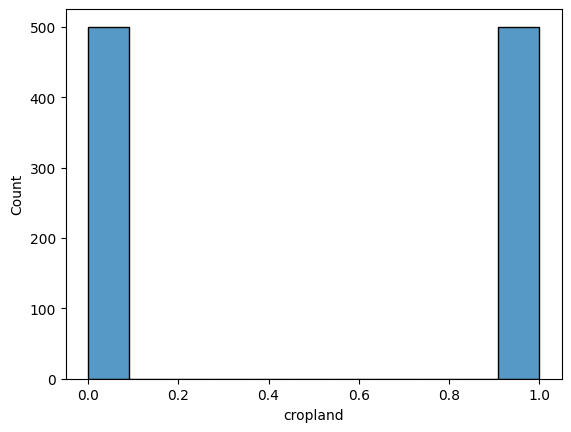

In [9]:
test=pd.read_csv("testing_9months_fix.csv") #Wheat_testing
print("Test dataset has {} samples and {} attributes".format(*test.shape))

print("cropland")
sns.histplot(test,x="cropland")

test["cropland"].describe()

test_copy = test.copy()


validation dataset has 1000 samples and 316 attributes
cropland


,system:index,MNDWI_HLS_01,MNDWI_HLS_02,MNDWI_HLS_03,MNDWI_HLS_04,MNDWI_HLS_05,MNDWI_HLS_06,MNDWI_HLS_09,MNDWI_HLS_10,MNDWI_HLS_11,...,wetness_1,wetness_2,wetness_3,wetness_4,wetness_5,wetness_6,wetness_7,wetness_8,wetness_9,.geo
0,0,0.559545,0.591016,-0.463975,-0.521834,-0.526024,-0.518204,-0.552230,-0.564804,-0.547042,...,-0.195573,-0.202580,0.264093,0.293840,0.090823,0.716612,-0.172992,-0.148015,-0.048694,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
1,1,0.889180,0.762098,-0.426972,-0.558732,-0.554425,-0.553840,-0.588355,-0.595303,-0.603184,...,-0.174667,-0.157314,0.324134,0.342462,0.171000,0.489341,-0.159939,-0.201927,-0.223154,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
2,2,0.515741,0.226736,-0.491124,-0.503814,-0.506637,-0.521299,-0.567114,-0.569783,-0.591890,...,-0.158243,-0.168107,0.293735,0.268276,0.113355,0.314443,-0.102762,-0.142679,-0.047538,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
3,3,0.841361,0.712695,-0.490337,-0.503022,-0.500980,-0.551970,-0.539596,-0.544346,-0.514949,...,-0.135223,-0.162616,0.371303,0.467754,0.184716,0.234878,-0.198877,-0.126955,-0.153433,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
4,4,0.952126,0.888922,-0.433219,-0.478091,-0.470588,-0.421334,-0.485946,-0.494004,-0.506746,...,-0.157001,-0.169090,0.306622,0.490497,0.439782,0.098698,-0.166607,-0.101715,0.024718,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0.991894,0.928567,-0.497529,-0.541452,-0.536035,-0.447337,-0.525926,-0.536682,-0.554873,...,-0.135399,-0.084381,0.570497,0.749114,0.569490,0.767125,-0.007727,0.001669,-0.003738,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
996,996,0.925917,0.896242,-0.485956,-0.502695,-0.491723,-0.437884,-0.484980,-0.497104,-0.490561,...,-0.171080,-0.138425,0.113548,0.486514,0.478787,0.585949,-0.199857,-0.095853,-0.012258,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
997,997,0.983938,0.903858,-0.522583,-0.517011,-0.516803,-0.453967,-0.509177,-0.530327,-0.565271,...,-0.184628,-0.210805,0.220085,0.658646,0.647196,0.353785,-0.231455,-0.212017,0.024439,"{""geodesic"":false,""type"":""Point"",""coordinates""..."
998,998,0.920573,0.806069,-0.561012,-0.533721,-0.543736,-0.476580,-0.532513,-0.527823,-0.508108,...,-0.178781,-0.150037,0.488443,0.457567,0.476547,0.678803,-0.127702,-0.126247,-0.013053,"{""geodesic"":false,""type"":""Point"",""coordinates""..."


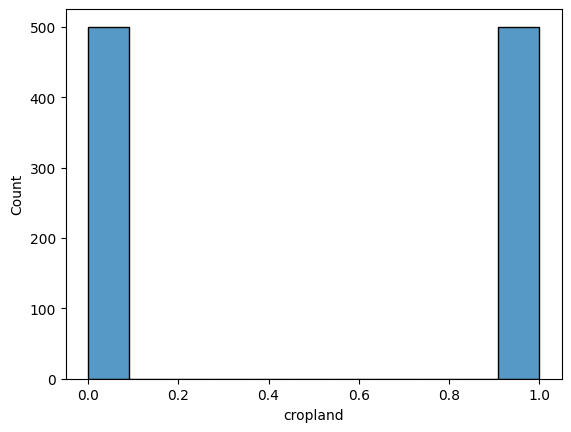

In [10]:
validation=pd.read_csv("validation_9months_fix.csv") #Wheat_validation
print("validation dataset has {} samples and {} attributes".format(*validation.shape))

print("cropland")
sns.histplot(validation,x="cropland")

validation["cropland"].describe()

validation_copy = validation.copy()
validation_copy

train

In [11]:
y_train=pd.DataFrame(train_copy['cropland'])
y_train

,cropland
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,1


In [12]:
train_copy.drop(['system:index', 'cropland', 'random', '.geo'], axis=1, inplace=True)
x_train = train_copy
x_train

,MNDWI_HLS_01,MNDWI_HLS_02,MNDWI_HLS_03,MNDWI_HLS_04,MNDWI_HLS_05,MNDWI_HLS_06,MNDWI_HLS_09,MNDWI_HLS_10,MNDWI_HLS_11,MNDWI_HLS_12,...,wetness,wetness_1,wetness_2,wetness_3,wetness_4,wetness_5,wetness_6,wetness_7,wetness_8,wetness_9
0,0.927531,0.932169,-0.540465,-0.514886,-0.505637,-0.526930,-0.524748,-0.561581,-0.500756,-0.500756,...,0.037664,-0.088103,-0.162584,0.445410,0.605274,0.745086,0.322594,-0.146694,-0.259656,0.018061
1,0.810978,0.900998,-0.498405,-0.472780,-0.488294,-0.424793,-0.451252,-0.464430,-0.498249,-0.498249,...,-0.195760,-0.181664,-0.197370,0.429525,0.444752,0.519597,0.339124,-0.191232,-0.194628,-0.116219
2,0.845523,0.605920,-0.494954,-0.486498,-0.476515,-0.484140,-0.486501,-0.498432,-0.490338,-0.490338,...,-0.242049,-0.210155,-0.139792,0.201364,0.415457,0.179021,0.245617,-0.213784,-0.150063,0.016220
3,0.912412,0.894428,-0.541563,-0.524211,-0.525697,-0.525476,-0.549814,-0.564191,-0.550349,-0.550349,...,-0.228676,-0.211210,-0.247842,0.297851,0.549367,0.582072,0.091111,-0.234262,-0.188347,-0.019391
4,0.951353,0.926099,-0.455438,-0.433273,-0.403600,-0.486116,-0.427406,-0.424835,-0.423932,-0.423932,...,-0.191003,-0.170321,-0.106897,0.471509,0.629071,0.738153,0.254831,-0.175089,-0.036996,-0.053643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.683240,0.798270,-0.442802,-0.435570,-0.422558,-0.419895,-0.448681,-0.447283,-0.455652,-0.455652,...,-0.194299,-0.165252,-0.150480,0.480640,0.081141,0.160336,0.491725,-0.183894,-0.167568,-0.019050
996,0.594270,0.852341,-0.467767,-0.449104,-0.431235,-0.478418,-0.448928,-0.465019,-0.469613,-0.469613,...,-0.216066,-0.178519,-0.200755,-0.077752,0.241789,0.514337,0.210646,-0.213356,-0.147213,-0.017767
997,0.319793,0.810700,-0.467988,-0.451455,-0.431898,-0.467767,-0.448688,-0.467398,-0.469897,-0.469897,...,-0.216873,-0.179100,-0.200908,-0.078616,0.214174,0.499692,0.207882,-0.213796,-0.146326,-0.009616
998,0.750331,0.866644,-0.454505,-0.437548,-0.408711,-0.495734,-0.435009,-0.432247,-0.428088,-0.428088,...,-0.198565,-0.168046,-0.069161,0.473961,0.378983,0.639520,0.206910,-0.177790,-0.170162,-0.033310


test

In [13]:
y_test=pd.DataFrame(test_copy['cropland'])
y_test

,cropland
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,1


In [14]:
test_copy.drop(['system:index', 'cropland', 'random', '.geo'], axis=1, inplace=True)
x_test = test_copy
x_test

,MNDWI_HLS_01,MNDWI_HLS_02,MNDWI_HLS_03,MNDWI_HLS_04,MNDWI_HLS_05,MNDWI_HLS_06,MNDWI_HLS_09,MNDWI_HLS_10,MNDWI_HLS_11,MNDWI_HLS_12,...,wetness,wetness_1,wetness_2,wetness_3,wetness_4,wetness_5,wetness_6,wetness_7,wetness_8,wetness_9
0,0.525668,0.612498,-0.285768,-0.445249,-0.447158,-0.456529,-0.470210,-0.480622,-0.480655,-0.480655,...,-0.193372,-0.178810,-0.174517,0.410630,0.351235,0.314864,0.075844,-0.186075,-0.173176,-0.084600
1,0.566354,0.069055,-0.317822,-0.509223,-0.501395,-0.514091,-0.570525,-0.568474,-0.565616,-0.565616,...,-0.193461,-0.180441,-0.198499,0.293617,0.213294,-0.005474,0.643121,-0.174518,-0.116458,-0.068180
2,0.984515,0.936773,-0.449002,-0.492764,-0.516595,-0.435963,-0.401049,-0.487549,-0.490078,-0.490078,...,0.023545,-0.050385,-0.137592,0.328634,0.648077,0.739915,0.633266,-0.239383,-0.214451,0.077313
3,0.770939,0.695438,-0.438676,-0.515259,-0.508122,-0.500551,-0.557544,-0.565404,-0.575211,-0.575211,...,-0.190518,-0.179325,-0.165063,0.272500,0.309660,0.149928,0.557047,-0.140653,-0.193018,-0.152324
4,0.737475,0.639145,-0.359096,-0.453176,-0.446647,-0.428271,-0.442399,-0.450503,-0.459672,-0.459672,...,-0.190922,-0.162844,-0.135936,0.407336,0.328274,0.375798,0.742872,-0.104205,-0.150759,-0.023039
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.999048,0.935828,-0.481978,-0.491529,-0.368356,-0.455088,-0.450528,-0.474340,-0.463261,-0.463261,...,-0.185358,-0.179750,-0.173147,0.431885,0.732447,0.391840,0.674049,-0.153958,-0.155244,-0.015734
996,0.676727,0.856055,-0.326787,-0.522665,-0.514572,-0.467120,-0.528641,-0.530667,-0.517969,-0.517969,...,-0.208972,-0.208300,-0.186491,0.306887,0.304851,0.664701,0.743474,-0.146090,-0.168224,-0.007842
997,1.000000,0.935475,-0.420208,-0.519462,-0.508197,-0.504599,-0.495142,-0.513713,-0.515325,-0.515325,...,-0.219885,-0.177984,-0.165200,0.516491,0.654505,0.659290,0.751178,-0.110395,-0.145144,-0.055891
998,0.954050,0.821740,-0.378479,-0.508700,-0.510432,-0.481430,-0.524044,-0.525003,-0.521499,-0.521499,...,-0.215045,-0.172476,-0.147139,0.421452,0.470055,0.320562,0.601835,-0.130459,-0.122613,-0.021891


In [15]:
y_validation = pd.DataFrame(validation_copy['cropland'])
y_validation

,cropland
0,0
1,0
2,0
3,0
4,0
...,...
995,1
996,1
997,1
998,1


In [16]:
validation_copy.drop(['system:index', 'cropland', 'random', '.geo'], axis=1, inplace=True)
x_validation = validation_copy
x_validation

,MNDWI_HLS_01,MNDWI_HLS_02,MNDWI_HLS_03,MNDWI_HLS_04,MNDWI_HLS_05,MNDWI_HLS_06,MNDWI_HLS_09,MNDWI_HLS_10,MNDWI_HLS_11,MNDWI_HLS_12,...,wetness,wetness_1,wetness_2,wetness_3,wetness_4,wetness_5,wetness_6,wetness_7,wetness_8,wetness_9
0,0.559545,0.591016,-0.463975,-0.521834,-0.526024,-0.518204,-0.552230,-0.564804,-0.547042,-0.547042,...,-0.205746,-0.195573,-0.202580,0.264093,0.293840,0.090823,0.716612,-0.172992,-0.148015,-0.048694
1,0.889180,0.762098,-0.426972,-0.558732,-0.554425,-0.553840,-0.588355,-0.595303,-0.603184,-0.603184,...,-0.185120,-0.174667,-0.157314,0.324134,0.342462,0.171000,0.489341,-0.159939,-0.201927,-0.223154
2,0.515741,0.226736,-0.491124,-0.503814,-0.506637,-0.521299,-0.567114,-0.569783,-0.591890,-0.591890,...,-0.173538,-0.158243,-0.168107,0.293735,0.268276,0.113355,0.314443,-0.102762,-0.142679,-0.047538
3,0.841361,0.712695,-0.490337,-0.503022,-0.500980,-0.551970,-0.539596,-0.544346,-0.514949,-0.514949,...,-0.131899,-0.135223,-0.162616,0.371303,0.467754,0.184716,0.234878,-0.198877,-0.126955,-0.153433
4,0.952126,0.888922,-0.433219,-0.478091,-0.470588,-0.421334,-0.485946,-0.494004,-0.506746,-0.506746,...,-0.175184,-0.157001,-0.169090,0.306622,0.490497,0.439782,0.098698,-0.166607,-0.101715,0.024718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.991894,0.928567,-0.497529,-0.541452,-0.536035,-0.447337,-0.525926,-0.536682,-0.554873,-0.554873,...,-0.220848,-0.135399,-0.084381,0.570497,0.749114,0.569490,0.767125,-0.007727,0.001669,-0.003738
996,0.925917,0.896242,-0.485956,-0.502695,-0.491723,-0.437884,-0.484980,-0.497104,-0.490561,-0.490561,...,-0.205440,-0.171080,-0.138425,0.113548,0.486514,0.478787,0.585949,-0.199857,-0.095853,-0.012258
997,0.983938,0.903858,-0.522583,-0.517011,-0.516803,-0.453967,-0.509177,-0.530327,-0.565271,-0.565271,...,-0.233379,-0.184628,-0.210805,0.220085,0.658646,0.647196,0.353785,-0.231455,-0.212017,0.024439
998,0.920573,0.806069,-0.561012,-0.533721,-0.543736,-0.476580,-0.532513,-0.527823,-0.508108,-0.508108,...,-0.235614,-0.178781,-0.150037,0.488443,0.457567,0.476547,0.678803,-0.127702,-0.126247,-0.013053


In [ ]:
# # Example: If you have a DataFrame 'df' with 'rh100' as the target column.
# def plot_scatter_with_cropland(x_train, target_column='cropland'):
#     # Check if 'rh100' exists in the DataFrame
#     if target_column not in train.columns:
#         raise ValueError(f"'{target_column}' is not a column in the DataFrame.")

#     # Set up the number of subplots based on the number of columns (excluding 'rh100')
#     features = train.drop(columns=[target_column]).columns
#     num_cols = len(features)
#     num_rows = (num_cols // 3) + 1  # Customize for more/less features per row

#     fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5 * num_rows))  # Adjust figure size
#     axes = axes.flatten()  # Flatten the axes array for easy indexing

#     for i, column in enumerate(features):
#         sns.scatterplot(x=train[column], y=train[target_column], ax=axes[i])
#         axes[i].set_title(f"{column} vs {target_column}")
#         axes[i].set_xlabel(column)
#         axes[i].set_ylabel(target_column)

#     # Remove any unused subplots
#     for j in range(i + 1, len(axes)):
#         fig.delaxes(axes[j])

#     plt.tight_layout()
#     plt.show()

# # Example: df = pd.read_csv('your_dataset.csv')
# plot_scatter_with_cropland(train)

In [17]:
head_list = list(x_train.columns.values)
head_list

['MNDWI_HLS_01',
 'MNDWI_HLS_02',
 'MNDWI_HLS_03',
 'MNDWI_HLS_04',
 'MNDWI_HLS_05',
 'MNDWI_HLS_06',
 'MNDWI_HLS_09',
 'MNDWI_HLS_10',
 'MNDWI_HLS_11',
 'MNDWI_HLS_12',
 'MNDWI_LS_01',
 'MNDWI_LS_02',
 'MNDWI_LS_03',
 'MNDWI_LS_04',
 'MNDWI_LS_05',
 'MNDWI_LS_06',
 'MNDWI_LS_09',
 'MNDWI_LS_10',
 'MNDWI_LS_11',
 'MNDWI_LS_12',
 'NDBI_HLS_01',
 'NDBI_HLS_02',
 'NDBI_HLS_03',
 'NDBI_HLS_04',
 'NDBI_HLS_05',
 'NDBI_HLS_06',
 'NDBI_HLS_09',
 'NDBI_HLS_10',
 'NDBI_HLS_11',
 'NDBI_HLS_12',
 'NDBI_LS_01',
 'NDBI_LS_02',
 'NDBI_LS_03',
 'NDBI_LS_04',
 'NDBI_LS_05',
 'NDBI_LS_06',
 'NDBI_LS_09',
 'NDBI_LS_10',
 'NDBI_LS_11',
 'NDBI_LS_12',
 'NDMI_HLS_01',
 'NDMI_HLS_02',
 'NDMI_HLS_03',
 'NDMI_HLS_04',
 'NDMI_HLS_05',
 'NDMI_HLS_06',
 'NDMI_HLS_09',
 'NDMI_HLS_10',
 'NDMI_HLS_11',
 'NDMI_HLS_12',
 'NDMI_LS_01',
 'NDMI_LS_02',
 'NDMI_LS_03',
 'NDMI_LS_04',
 'NDMI_LS_05',
 'NDMI_LS_06',
 'NDMI_LS_09',
 'NDMI_LS_10',
 'NDMI_LS_11',
 'NDMI_LS_12',
 'NDWI_HLS_01',
 'NDWI_HLS_02',
 'NDWI_HLS_03',
 '

In [18]:
corr_df=train[head_list]  #New dataframe to calculate correlation between numeric features
cor= corr_df.corr(method='pearson')
print(cor)

              MNDWI_HLS_01  MNDWI_HLS_02  MNDWI_HLS_03  MNDWI_HLS_04  \
MNDWI_HLS_01      1.000000      0.684764      0.140429     -0.158582   
MNDWI_HLS_02      0.684764      1.000000     -0.015277     -0.170395   
MNDWI_HLS_03      0.140429     -0.015277      1.000000      0.257392   
MNDWI_HLS_04     -0.158582     -0.170395      0.257392      1.000000   
MNDWI_HLS_05     -0.129085     -0.141928      0.280045      0.933686   
...                    ...           ...           ...           ...   
wetness_5         0.509504      0.756148     -0.163989     -0.168735   
wetness_6         0.344243      0.328582      0.340182     -0.068632   
wetness_7         0.125092      0.086585      0.042669      0.015366   
wetness_8         0.196253      0.211738      0.142588     -0.046673   
wetness_9         0.158426      0.258963     -0.064544     -0.148545   

              MNDWI_HLS_05  MNDWI_HLS_06  MNDWI_HLS_09  MNDWI_HLS_10  \
MNDWI_HLS_01     -0.129085      0.124681      0.090753      0.0

In [19]:
fig, ax =plt.subplots(figsize=(150, 150))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

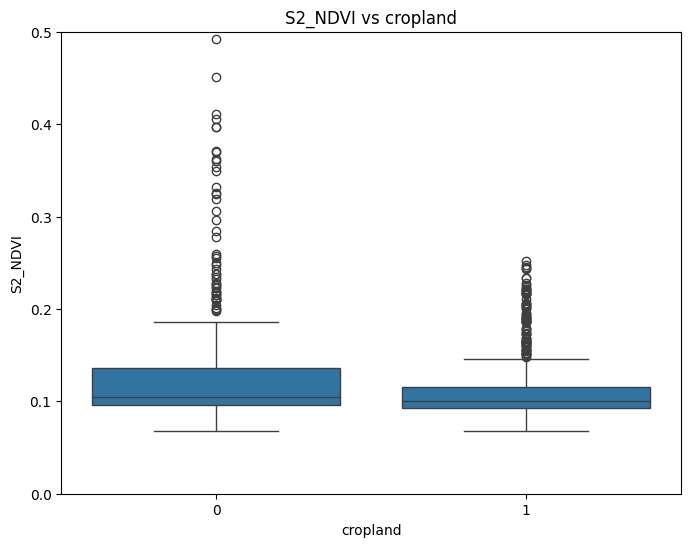

In [20]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='cropland',y='S2_NDVI', data=train)
ax.set_ylim(0,.5)
plt.title("S2_NDVI vs cropland")
plt.show()

In [ ]:
# # Path to the 5-band TIFF file
# from rasterio.enums import Resampling


# input_tiff_path = '/content/drive/MyDrive/Colab_workspace/LandsatComposite_2022.tif'
# output_tiff_path = '/content/drive/MyDrive/Colab_workspace/output_33_band_tiff.tif'

# # Open the 5-band TIFF file
# with rasterio.open(input_tiff_path) as src:
#     # Read all 5 bands into an array
#     bands_data = src.read()

#     # Check the shape of the original 5-band data
#     # Shape will be (bands, height, width)
#     print(f"Original shape: {bands_data.shape}")

#     # Create a new array for 33 bands (by repeating the 5-band data)
#     # We use np.tile to duplicate the 5-band data 7 times and select the first 33 bands
#     bands_33 = np.tile(bands_data, (7, 1, 1))[:33]

#     # Check the new shape
#     print(f"New shape with 33 bands: {bands_33.shape}")

#     # Update the metadata to reflect the new number of bands
#     new_meta = src.meta.copy()
#     new_meta.update(count=33)

#     # Write the new 33-band TIFF file
#     with rasterio.open(output_tiff_path, 'w', **new_meta) as dst:
#         dst.write(bands_33)

# print("33-band TIFF file created successfully.")

In [ ]:
# # Path to the 33-band TIFF file
# input_tiff_path = '/content/drive/MyDrive/Colab_workspace/output_33_band_tiff.tif'
# output_tiff_path = '/content/drive/MyDrive/Colab_workspace/output_2d_tiff.tif'

# # Open the 33-band TIFF file
# with rasterio.open(input_tiff_path) as src:
#     # Read all 33 bands
#     bands_data = src.read()

#     # Check the shape of the original 33-band data
#     print(f"Original shape: {bands_data.shape}")

#     # Collapse the 33-band image to 2D by taking the mean of the bands
#     collapsed_image = np.mean(bands_data, axis=0)

#     # Check the new shape (should be 2D: 1338, 2082)
#     print(f"Collapsed image shape: {collapsed_image.shape}")

#     # Update the metadata to reflect the change to 1 band
#     new_meta = src.meta.copy()
#     new_meta.update(count=1)

#     # Write the new 2D TIFF file
#     with rasterio.open(output_tiff_path, 'w', **new_meta) as dst:
#         dst.write(collapsed_image, 1)

# print("2D TIFF image created successfully.")


In [ ]:

# image_path = 'output_2d_tiff.tif'

# # Load the .tif image using rasterio
# with rasterio.open(image_path) as src:
#     image2D = src.read()  # Read all the bands of the image

# # Check the dimensions of the image (bands, height, width)
# print(image2D)

In [ ]:
# # Path to the input and output TIFF files
# input_tiff_path = '/content/drive/MyDrive/Colab_workspace/output_33_band_tiff.tif'
# output_tiff_path = '/content/drive/MyDrive/Colab_workspace/output_tiff_no_nans.tif'

# # Open the TIFF file
# with rasterio.open(input_tiff_path) as src:
#     # Read the data into a NumPy array
#     image_data = src.read()

#     # Check for NaN values
#     nan_mask = np.isnan(image_data)

#     # Create a mask of where there are valid (non-NaN) values
#     valid_mask = ~np.all(nan_mask, axis=0)

#     # Find the rows and columns where there are valid values
#     valid_rows = np.where(np.any(valid_mask, axis=1))[0]
#     valid_cols = np.where(np.any(valid_mask, axis=0))[0]

#     # Get the bounding box of the valid data
#     min_row, max_row = valid_rows[0], valid_rows[-1]
#     min_col, max_col = valid_cols[0], valid_cols[-1]

#     # Crop the image data based on the valid bounding box
#     cropped_data = image_data[:, min_row:max_row+1, min_col:max_col+1]

#     # Update the metadata for the cropped image
#     new_meta = src.meta.copy()
#     new_meta.update({
#         'height': cropped_data.shape[1],  # new height
#         'width': cropped_data.shape[2],   # new width
#         'transform': src.window_transform(((min_row, max_row+1), (min_col, max_col+1)))  # update transform
#     })

#     # Write the cropped image to a new TIFF file
#     with rasterio.open(output_tiff_path, 'w', **new_meta) as dst:
#         dst.write(cropped_data)

# print(f"Cropped TIFF saved successfully to {output_tiff_path}")


In [ ]:
# image_path = 'output_tiff_no_nans.tif'

# # Load the .tif image using rasterio
# with rasterio.open(image_path) as src:
#     image2D_nan = src.read()  # Read all the bands of the image

# # Check the dimensions of the image (bands, height, width)
# print(image2D_nan)
# print(image2D_nan.shape)

In [ ]:

# # Replace 'your_image.tif' with the actual file name of the uploaded .tif image
# image_path = 'output_tiff_no_nans.tif' #LandsatComposite_2022 # Stack_Reasmpled_10_16

# # Load the .tif image using rasterio
# with rasterio.open(image_path) as src:
#     image_nan = src.read()  # Read all the bands of the image

# # Check the dimensions of the image (bands, height, width)
# print(image_nan.shape)
# image_nan



In [ ]:
# image_reshaped = image_nan.reshape(image_nan.shape[0], -1).T  # Shape will be (num_pixels, num_bands)
# print("Reshaped image shape:", image_reshaped.shape)

In [ ]:
# # Single-band image (e.g., grayscale or elevation data)
# plt.figure(figsize=(8, 8))
# plt.imshow(image_nan[0], cmap='YlOrBr')  # Assuming it's a single-band image, use 'image[0]' to access the first band
# plt.title('Single-band .tif Image')
# plt.colorbar()
# plt.show()


In [ ]:
# Create some sample training labels (for simplicity, we manually define some points)
# For real-world applications, this part should involve actual labeled data

# Example: First 100 pixels are class 0 (e.g., water), next 100 pixels are class 1 (e.g., vegetation)
# # The size of labeled_data and labels should match the real data you use.
# labeled_data = image_reshaped[:200, :]  # Example labeled data (you need real labeled regions)
# labels = np.array([0] * 100 + [1] * 100)  # Example labels: 0 for first 100 pixels, 1 for next 100



# Grid Search params and data scaling

In [21]:
###scale data for algorithms that need it
sc = StandardScaler()
x_train_sc = pd.DataFrame(sc.fit_transform(x_train))
x_test_sc = pd.DataFrame(sc.transform(x_test))

In [22]:
##used for the MLP
scaler = MinMaxScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.fit_transform(x_test)

In [23]:
folds  = 5
score_calc = 'accuracy' #'neg_mean_squared_error'

In [ ]:
# def get_best_score(grid):

#     best_score = np.sqrt(-grid.best_score_)
#     print(best_score)
#     print(grid.best_params_)
#     print(grid.best_estimator_)

#     return best_score

In [24]:
def get_best_score(grid):

    best_score = grid.best_score_
    print(best_score)
    print(grid.best_params_)
    print(grid.best_estimator_)

    return best_score

## SVM Classificaiton

In [ ]:

param_grid = {'C': [10],'coef0': [0.01], 'degree': [3], 'gamma': [0.1], 'kernel': ['linear']}

# param_grid = {'kernel' : ['linear', 'poly', 'rbf', 'sigmoid'],
#               'C' : [0.1, 1, 10],
#               'degree' : [3],
#               'coef0' : [0.01,10],
#               'gamma' : [0.1, 0.01, 0.001]}

grid_svc = GridSearchCV(SVC(), param_grid, cv = folds, refit = True, verbose = 3, scoring = score_calc)
grid_svc.fit(x_train_sc.values, y_train["cropland"].values)

sc_svc = get_best_score(grid_svc)

pred_svc = grid_svc.predict(x_test_sc.values)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.895 total time=   0.0s
[CV 2/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.970 total time=   0.0s
[CV 3/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.950 total time=   0.0s
[CV 4/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.975 total time=   0.0s
[CV 5/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.910 total time=   0.0s
0.9400000000000001
{'C': 10, 'coef0': 0.01, 'degree': 3, 'gamma': 0.1, 'kernel': 'linear'}
SVC(C=10, coef0=0.01, gamma=0.1, kernel='linear')


In [ ]:
print('F1-Score:', f1_score(y_test, pred_svc))
print('Recall:', recall_score(y_test, pred_svc))
print('Accuracy:',accuracy_score(y_test, pred_svc))
print('Precision:',precision_score(y_test, pred_svc))
print('classification_report',classification_report(y_test, pred_svc))
cm = confusion_matrix(y_test, pred_svc)
cm

F1-Score: 1.0
Recall: 1.0
Accuracy: 1.0
Precision: 1.0
classification_report               precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       500

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



array([[500,   0],
       [  0, 500]])

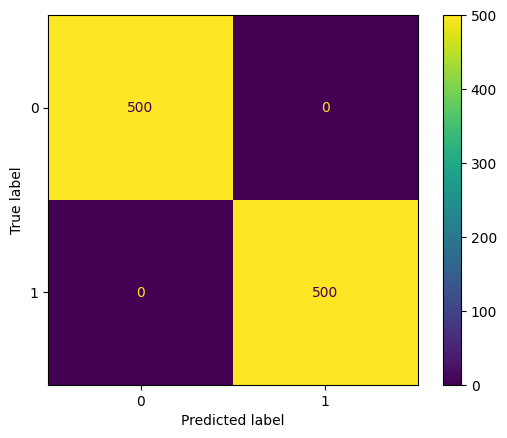

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot()

plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.880 total time=   0.1s
[CV 2/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.945 total time=   0.1s
[CV 3/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.980 total time=   0.1s
[CV 4/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.980 total time=   0.1s
[CV 5/5] END C=10, coef0=0.01, degree=3, gamma=0.1, kernel=linear;, score=0.820 total time=   0.0s


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

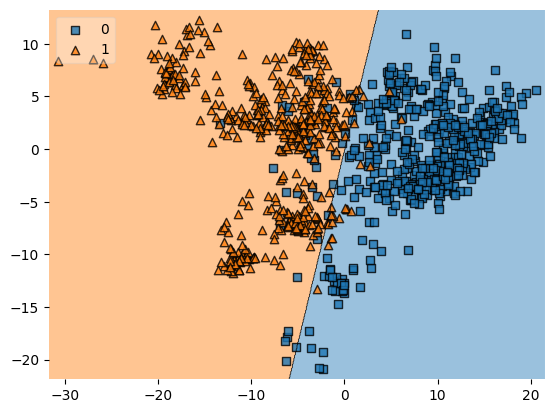

In [ ]:
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train_sc.values)
grid_svc.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train["cropland"].values, clf=grid_svc, legend=2)

plt.xlabel(X_train2.columns[0], size=14)
plt.ylabel(X_train2.columns[1], size=14)
plt.title('SVM Decision Region Boundary', size=16)


      Feature  Importance
198     VH_16    0.462935
192     VH_10    0.451705
203      VH_3    0.430010
19    MNDWI_9    0.421029
199     VH_17    0.417702
..        ...         ...
317   ratio_8    0.001009
215     VV_13    0.000951
267  fourth_8    0.000474
14    MNDWI_4    0.000466
64    NDVI_12    0.000128

[348 rows x 2 columns]


Text(0.5, 1.0, 'Feature Importance from GridSearchCV Optimized Linear SVM')

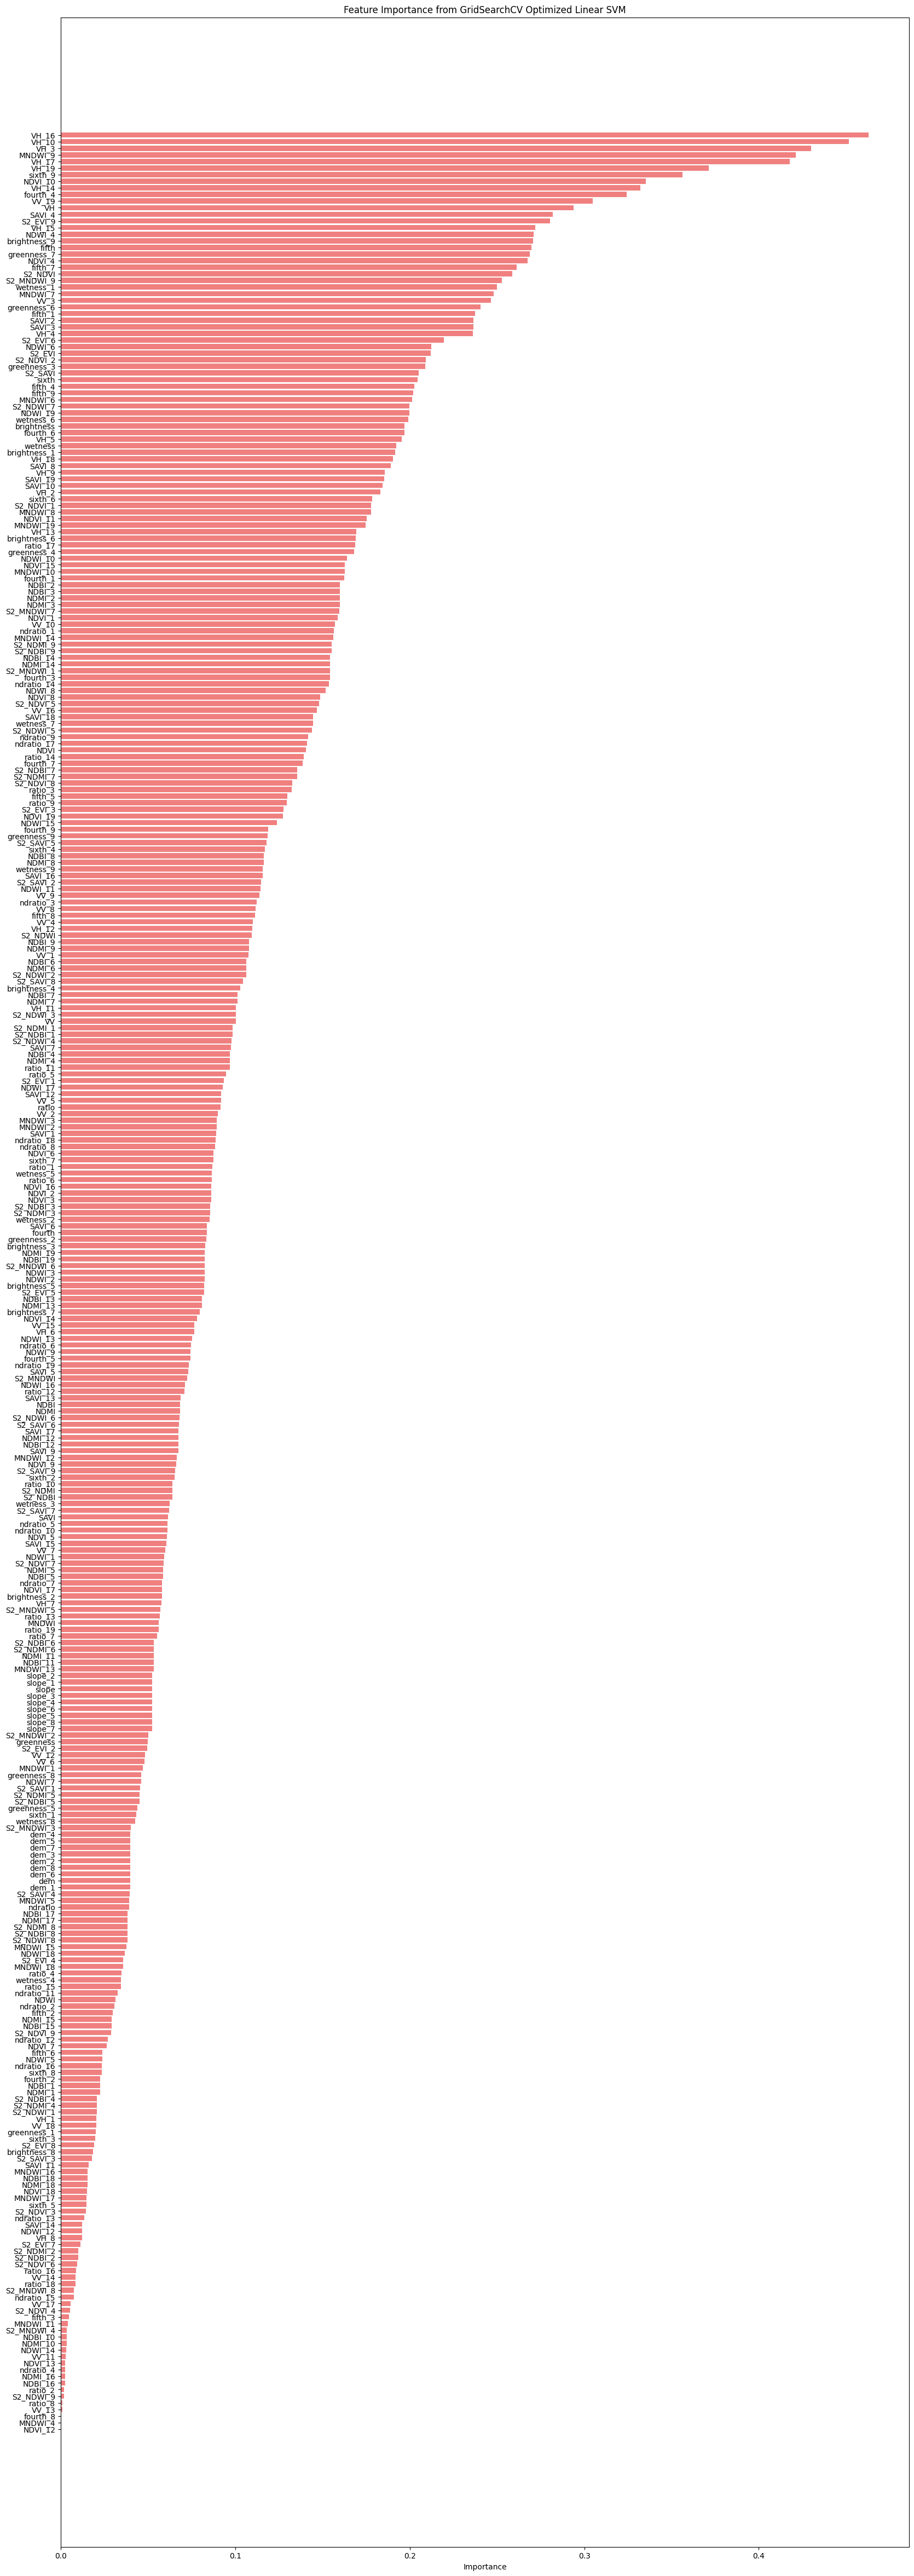

In [ ]:

best_model = grid_svc.best_estimator_

coefficients = np.abs(best_model.coef_).flatten()

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': x_train.columns.values, 'Importance': coefficients})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance)

# Plot the feature importance
plt.figure(figsize=(20, 60))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='lightcoral')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance from GridSearchCV Optimized Linear SVM')

In [ ]:
# Load a sample GeoTIFF image (update the file path as needed)
# image_path = '/content/drive/MyDrive/Colab_workspace/Stack_Reasmpled_10_16.tif'
# image = geemap.load_GeoTIFF(image_path)

image = ee.Image("projects/servir-sco-assets/assets/AIA_Project/stackedResampled")

# Define training data points (with example coordinates)
# land_class_1 = ee.Geometry.Point([longitude1, latitude1])
# land_class_2 = ee.Geometry.Point([longitude2, latitude2])

# Create labeled feature collection
training_data = ee.FeatureCollection("projects/servir-sco-assets/assets/AIA_Project/Wheat_training")

# Sample the image to create training data
training = image.sampleRegions(
    collection=training_data,
    properties=['cropland'],
    scale=10
)

# Train a Random Forest classifier
classifier = ee.Classifier.libsvm().train(
    features=training,
    classProperty='cropland',
    inputProperties=image.bandNames()
)

# Apply the classifier to the image
classified = image.classify(classifier)

wheat_only = classified.select('classification').eq(1)
wheat_only_final = classified.updateMask(wheat_only);
Map.addLayer(wheat_only_final, {'min': 1, 'max': 1, 'palette': ["ffa630"]}, 'wheat_only_final');
Map.centerObject(wheat_only_final, 10)
# # Optional: Export classified image to Google Drive
# export_task = ee.batch.Export.image.toDrive(
#     image=classified,
#     description='Classified_Image',
#     folder='EarthEngineImages',
#     fileNamePrefix='classified_image',
#     scale=30,
#     region=image.geometry().bounds().getInfo()
# )
# export_task.start()

table = ee.FeatureCollection("projects/servir-sco-assets/assets/AIA_Project/Wheat_training_2023_Groundtruth")

fcPolygonSamp = classified.sampleRegions(**{
  'collection': table,
  'scale': 10,
  'geometries': True
});

Map.addLayer(fcPolygonSamp, {}, 'groundTruth_2023')


Map

In [ ]:
# print("stat_sample", stat_sample)
stat_sample_df = geemap.ee_to_df(fcPolygonSamp)
# print("stat_sample_df", stat_sample_df)
y_true = stat_sample_df['cropland']
y_pred = stat_sample_df['classification']


print('F1-Score:', f1_score(y_true, y_pred))
print('Recall:', recall_score(y_true, y_pred))
print('Accuracy:',accuracy_score(y_true, y_pred))
print('Precision:',precision_score(y_true, y_pred))
print('classification_report',classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
cm


In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot()

plt.show()

In [ ]:
# svm_model = SVC(C=10, coef0=0.01, gamma=0.1, kernel='linear')
# svm_model.fit(x_train_sc.values, y_train["cropland"].values)

# svm_model

In [ ]:
# from google.colab.patches import cv2_imshow

# def hist_stretch(x):
#     _, n = x.shape
#     for k in range(n):
#         data = x[:, k]
#         cur_lim = np.quantile(data, (0.025, 0.975))
#         data = np.maximum(cur_lim[0], np.minimum(cur_lim[1], data))
#         data = np.floor(255*(data-cur_lim[0])/(cur_lim[1]-cur_lim[0]))
#         x[:, k] = data
#     return x

# f = gdal.Open("output_tiff_no_nans.tif")
# d = f.RasterCount
# w = f.RasterXSize  # 1021
# h = f.RasterYSize  # 731

# A_image = f.ReadAsArray(0, 0, w, h)
# A_image_data = A_image.copy().transpose(1, 2, 0).reshape(-1, d)  # (746351, 72)

# # Histogram stretch for display. Only first 8 bands.
# A_image_data[:, 0:8] = hist_stretch(A_image_data[:, 0:8])

# # Set RGB composition
# red = A_image_data.reshape(h, w, d)[:, :, 3]
# green = A_image_data.reshape(h, w, d)[:, :, 2]
# blue = A_image_data.reshape(h, w, d)[:, :, 1]
# image = np.concatenate((blue[:, :, None], green[:, :, None], red[:, :, None]), axis=-1)

# cv2_imshow(image)

In [ ]:


# ymap = svm_model.predict(A_image.transpose(1, 2, 0).reshape(-1, d)[:,])
# w = f.RasterXSize  # 1021
# h = f.RasterYSize  # 731
# ymap = ymap.reshape(h, w)

# df = pd.DataFrame(ymap)
# #sns.heatmap(data=df, cmap=[[0, 1, 0], [1, 0, 0], [0, 0, 1], [1, 1, 0],
#  #[1, 0, 1], [46/255, 139/255, 87/255]])
# fig = sns.heatmap(data=df, cmap= 'YlOrBr' )
# heatmap = fig.get_figure()
# heatmap.savefig("./classification_map.tif", dpi = 400)

In [ ]:
# import rasterio

# image_path = 'output_tiff_no_nans.tif'

# # Open the image
# with rasterio.open(image_path) as src:
#     image_nan_im = src.read()  # shape will be (bands, height, width)
#     print(f"Original image shape (bands, height, width): {image.shape}")

In [ ]:
# image_reshaped = image.reshape(image_nan_im.shape[0], -1).T  # Now shape will be (num_pixels, num_bands)
# print(f"Reshaped image shape: {image_reshaped.shape}")
# image_reshaped

In [ ]:
# predicted_labels = svm_model.predict(image_reshaped)
# # predicted_labels.describe()

# ww=pd.DataFrame(predicted_labels)
# ww.describe()

In [ ]:
# # Classify the entire image
# # image_scaled = sc.transform(image_reshaped)
# predicted_labels = svm_model.predict(image_reshaped)

# height = 1336
# width = 2080

# # n_bands, height, width = image_scaled.shape
# # image = image.reshape((n_bands, height * width)).T

# # Reshape the predicted labels back to the original image shape
# predicted_labels_image = predicted_labels.reshape((height, width))

# # # Optionally save the classified image using rasterio
# # with rasterio.open('classified_image.tif', 'w', driver='GTiff',
# #                    height=height, width=width, count=1, dtype=predicted_labels_image.dtype) as dst:
# #     dst.write(predicted_labels_image, 1)

In [ ]:

# plt.figure(figsize=(8, 8))
# plt.imshow(predicted_labels_image, cmap='YlOrBr')  # Assuming it's a single-band image, use 'image[0]' to access the first band
# plt.title('Single-band .tif Image')
# plt.colorbar()
# plt.show()

## RF Classifer

In [ ]:

param_grid = {'min_samples_split' : [3], 'n_estimators' : [150], 'random_state': [5]}

# param_grid = {
#               'n_estimators': [10,50,100,150,200],
#               'criterion': ['gini', 'entropy', 'log_loss'],
#               'n_estimators': [50, 60, 70, 100, 150],
#               'max_depth':  [None, 2,4,6,8],
#               'max_features': ['sqrt', 'log2', None],
#               'min_samples_split': [2,4,6,8],
#               'random_state': [42]}


grid_rf = GridSearchCV(RandomForestClassifier(), param_grid, cv = folds, refit=True, verbose = 3, scoring = score_calc)
grid_rf.fit(x_train.values, y_train['cropland'].values)

sc_rf = get_best_score(grid_rf)
pred_rf = grid_rf.predict(x_test.values)


In [ ]:
print('F1-Score:', f1_score(y_test, pred_rf))
print('Recall:', recall_score(y_test, pred_rf))
print('Accuracy:',accuracy_score(y_test, pred_rf))
print('Precision:',precision_score(y_test, pred_rf))
print('classification_report',classification_report(y_test, pred_rf))
cm = confusion_matrix(y_test, pred_rf)
cm

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot()

plt.show()

In [ ]:
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train.values)
grid_rf.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train["cropland"].values, clf=grid_rf, legend=2)

plt.xlabel(X_train2.columns[0], size=14)
plt.ylabel(X_train2.columns[1], size=14)
plt.title('RF Decision Region Boundary', size=16)

In [ ]:
best_model = grid_rf.best_estimator_

# Get feature importance from the best model
feature_importance = best_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': x_train.columns.values, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='lightcoral')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Feature Importance from GridSearchCV Optimized XGBoost')
plt.show()

In [ ]:

explainer = shap.TreeExplainer(best_model)
sample = shap.utils.sample(x_test.values, 200)
shap_values = explainer.shap_values(sample)
shap.summary_plot(shap_values, sample) # max_display=10

In [ ]:
# shap.plots.beeswarm(shap_values)

In [ ]:
shap.plots.heatmap(shap_values[:1000])

In [ ]:
# #shap approach

# best_model = grid_rf.best_estimator_
# explainer = shap.KernelExplainer(best_model.predict, x_train.values)

# ## sample just n num of total data set https://github.com/shap/shap/issues/1197
# shap_values = explainer.shap_values(x_train.values, nsamples=35)  ## currently working but very  very slow
# # shap_values = explainer.shap_values( shap.sample(x_train.values, 35) )

# shap.summary_plot(shap_values, x_train.values, plot_type="bar")

In [ ]:

# Load a sample GeoTIFF image (update the file path as needed)
# image_path = '/content/drive/MyDrive/Colab_workspace/Stack_Reasmpled_10_16.tif'
# image = geemap.load_GeoTIFF(image_path)

image = ee.Image("projects/servir-sco-assets/assets/AIA_Project/stackedResampled")

# Define training data points (with example coordinates)
# land_class_1 = ee.Geometry.Point([longitude1, latitude1])
# land_class_2 = ee.Geometry.Point([longitude2, latitude2])

# Create labeled feature collection
training_data = ee.FeatureCollection("projects/servir-sco-assets/assets/AIA_Project/Wheat_training")

# Sample the image to create training data
training = image.sampleRegions(
    collection=training_data,
    properties=['cropland'],
    scale=10
)

# Train a Random Forest classifier
classifier = ee.Classifier.smileRandomForest(numberOfTrees=50).train(
    features=training,
    classProperty='cropland',
    inputProperties=image.bandNames()
)

# Apply the classifier to the image
classified = image.classify(classifier)

wheat_only = classified.select('classification').eq(1)
wheat_only_final_rf = classified.updateMask(wheat_only);
Map.addLayer(wheat_only_final_rf, {'min': 1, 'max': 1, 'palette': ["ffa630"]}, 'wheat_only_final_rf');
Map.centerObject(wheat_only_final_rf, 10)
# # Optional: Export classified image to Google Drive
# export_task = ee.batch.Export.image.toDrive(
#     image=classified,
#     description='Classified_Image',
#     folder='EarthEngineImages',
#     fileNamePrefix='classified_image',
#     scale=30,
#     region=image.geometry().bounds().getInfo()
# )
# export_task.start()

table = ee.FeatureCollection("projects/servir-sco-assets/assets/AIA_Project/Wheat_training_2023_Groundtruth")

fcPolygonSamp = classified.sampleRegions(**{
  'collection': table,
  'scale': 10,
  'geometries': True
});

Map.addLayer(fcPolygonSamp, {}, 'groundTruth_2023')


Map

In [ ]:

# print("stat_sample", stat_sample)
stat_sample_df = geemap.ee_to_df(fcPolygonSamp)
# print("stat_sample_df", stat_sample_df)
y_true = stat_sample_df['cropland']
y_pred = stat_sample_df['classification']


print('F1-Score:', f1_score(y_true, y_pred))
print('Recall:', recall_score(y_true, y_pred))
print('Accuracy:',accuracy_score(y_true, y_pred))
print('Precision:',precision_score(y_true, y_pred))
print('classification_report',classification_report(y_true, y_pred))
cm = confusion_matrix(y_true, y_pred)
cm

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot()

plt.show()

## XGBoost Classifer

In [31]:

param_grid = {
    'learning_rate': [0.01],
    'n_estimators': [200],
    'random_state': [42],
    'max_depth': [5],
    'gamma': [5],
    'min_child_weight': [10]  # Changed semicolon to colon
}

# param_grid = {'learning_rate': [0.005, 0.01, 0.001],
#               'n_estimators': [50,100,200],
#               'random_state': [42],
#               'gamma': [5, 10],
#               'min_child_weight': [5, 10, 15],
#               'max_depth': [5, 10]}

# param_grid = {'learning_rate' : [0.005,0.01,0.001], 'n_estimators' : [40,200], 'random_state': [5],
#               'max_depth' : [4,9]}
grid_xgb = GridSearchCV(XGBClassifier(), param_grid, cv = folds, refit=True, verbose = 0, scoring = score_calc)
grid_xgb.fit(x_train.values, y_train['cropland'].values)

sc_xgb = get_best_score(grid_xgb)
pred_xgb = grid_xgb.predict(x_test.values)

0.96
{'gamma': 5, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 10, 'n_estimators': 200, 'random_state': 42}
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


In [32]:
print('F1-Score:', f1_score(y_test, pred_xgb))
print('Recall:', recall_score(y_test, pred_xgb))
print('Accuracy:',accuracy_score(y_test, pred_xgb))
print('Precision:',precision_score(y_test, pred_xgb))
print('classification_report',classification_report(y_test, pred_xgb))
cm = confusion_matrix(y_test, pred_xgb)
cm

F1-Score: 0.9290853031860226
Recall: 0.904
Accuracy: 0.931
Precision: 0.9556025369978859
classification_report               precision    recall  f1-score   support

           0       0.91      0.96      0.93       500
           1       0.96      0.90      0.93       500

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



array([[479,  21],
       [ 48, 452]])

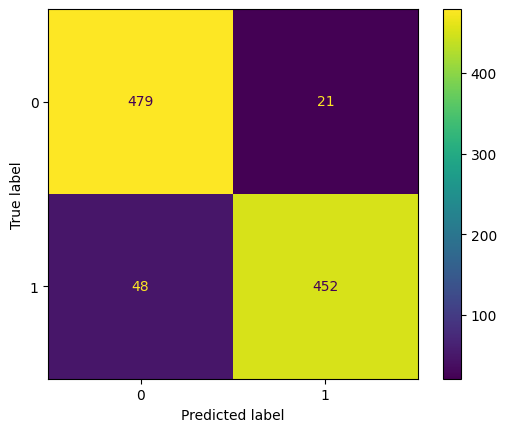

In [33]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot()

plt.show()

In [34]:
print('F1-Score:', f1_score(y_validation, pred_xgb))
print('Recall:', recall_score(y_validation, pred_xgb))
print('Accuracy:',accuracy_score(y_validation, pred_xgb))
print('Precision:',precision_score(y_validation, pred_xgb))
print('classification_report',classification_report(y_validation, pred_xgb))
cm = confusion_matrix(y_validation, pred_xgb)
cm

F1-Score: 0.9290853031860226
Recall: 0.904
Accuracy: 0.931
Precision: 0.9556025369978859
classification_report               precision    recall  f1-score   support

           0       0.91      0.96      0.93       500
           1       0.96      0.90      0.93       500

    accuracy                           0.93      1000
   macro avg       0.93      0.93      0.93      1000
weighted avg       0.93      0.93      0.93      1000



array([[479,  21],
       [ 48, 452]])

In [ ]:
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train.values)
grid_xgb.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train["cropland"].values, clf=grid_xgb, legend=2)

plt.xlabel(X_train2.columns[0], size=14)
plt.ylabel(X_train2.columns[1], size=14)
plt.title('xgb Decision Region Boundary', size=16)

         Feature  Importance
153  SAVI_HLS_04    0.212862
44   NDMI_HLS_05    0.157727
86      S2_EVI_6    0.064723
146    S2_SAVI_6    0.059144
119    S2_NDMI_9    0.050008
..           ...         ...
106    S2_NDBI_6    0.000000
105    S2_NDBI_5    0.000000
104    S2_NDBI_4    0.000000
103    S2_NDBI_3    0.000000
156  SAVI_HLS_09    0.000000

[312 rows x 2 columns]


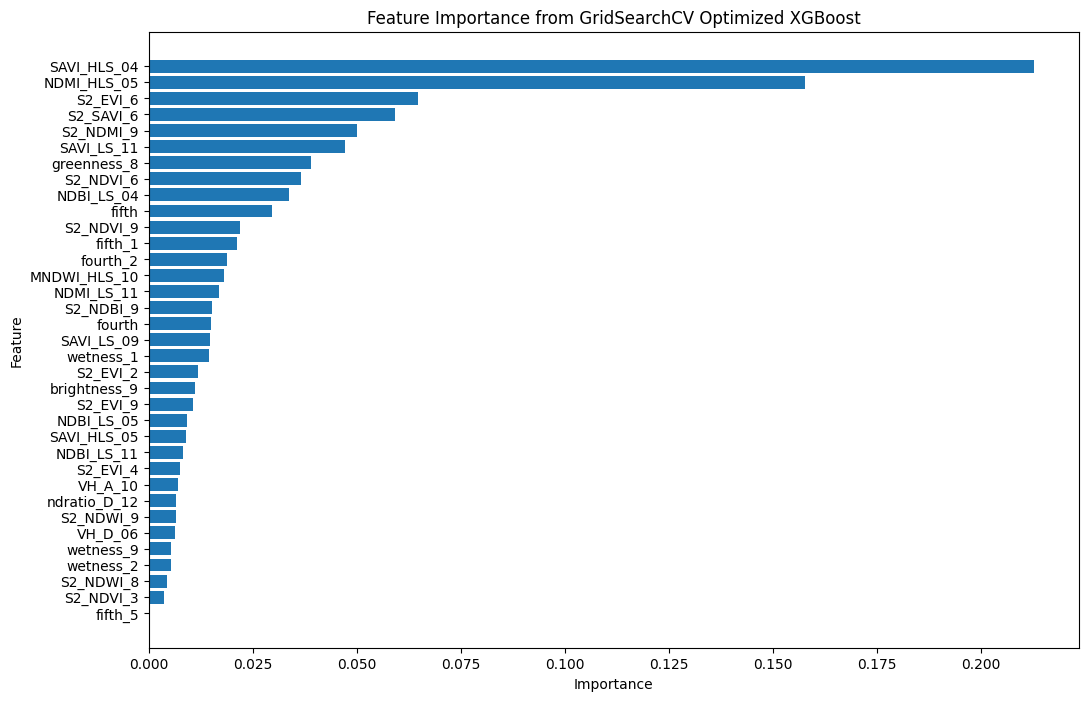

In [37]:
best_model = grid_xgb.best_estimator_

# Get feature importance from the best model
feature_importance = best_model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({'Feature': x_train.columns.values, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df)

# Select the top 35 features # This line is new
top_35_features = feature_importance_df.head(35)

# Plot feature importance
plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plt.barh(top_35_features['Feature'], top_35_features['Importance'])
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title('Feature Importance from GridSearchCV Optimized XGBoost')
plt.gca().invert_yaxis()  # Invert y-axis to show most important feature at the top
plt.show()

In [ ]:
# Load remote sensing image using rasterio
image_path = 'reassembled_image.tif'  # Replace with your image path

with rasterio.open(image_path) as dataset:
    reassembled_image = dataset.read()  # Reads all bands into a 3D NumPy array

# Single-band image (e.g., grayscale or elevation data)
plt.figure(figsize=(8, 8))
plt.imshow(reassembled_image[0], cmap='YlOrBr')  # Assuming it's a single-band image, use 'image[0]' to access the first band
plt.title('Single-band .tif Image')
plt.colorbar()
plt.show()

In [ ]:
# from PIL import Image
# import numpy as np

# # Load the image
# image = Image.open('reassembled_image.tif')
image_array = np.array(reassembled_image)

# Reshape the image into a 2D array of pixel values
channels, height, width = image_array.shape
pixel_values = image_array.reshape(height * width, channels)

print("height", height)
print("width", width)
print("channels", channels)
print(pixel_values.shape)

In [ ]:
# Assuming you need to take the first 33 features for the model
pixel_values_selected = pixel_values[:, :33]  # Adjust based on the features used in training

# Make sure the shape matches the expected number of features
print("Shape of selected pixel values for prediction:", pixel_values_selected.shape)


In [ ]:
best_model = grid_xgb.best_estimator_
model = best_model
model

In [ ]:
predictions = model.predict(pixel_values_selected)

# No need to convert to binary format, as predict() already outputs binary predictions
binary_predictions = predictions.astype(int)


In [ ]:
from PIL import Image

# Reshape binary predictions back to the original image dimensions
classified_image = binary_predictions.reshape(height, width)
print("classified_image.shape", classified_image.shape)


# Convert to an image
classified_image = Image.fromarray((classified_image * 255).astype(np.uint8))
classified_image.save('xgboost classified_image.tif')  # Save as a binary image


In [ ]:
# image = ee.Image("projects/servir-sco-assets/assets/AIA_Project/stackedResampled")
# image_array = geemap.ee_to_xarray(image)
# image_array


In [ ]:
# S2_NDVI= np.array(image_array['S2_NDVI'])

# S2_NDVI


In [ ]:
# bandlist = x_test.columns.values

# for i in bandlist:
#   i = np.array(image_array[i])
#   image_pixels = np.dstack([i])#.reshape(-1, 1)
#   print("image_pixels", image_pixels)


# # b1 = np.array(image_array['MNDWI_HLS'])
# # ,image_array['NDBI_HLS'],
# # image_array['NDBI_LS'],
# # image_array['NDMI_HLS'],
# # image_array['NDMI_LS'],
# # image_array['NDMI_LS'],
# # image_array['NDWI_HLS'],
# # image_array['NDWI_LS'],
# # image_array['S2_EVI'],
# # image_array['S2_MNDWI'],
# # image_array['S2_NDBI'],
# # image_array['S2_NDMI'],
# # image_array['S2_NDVI'],
# # image_array['S2_NDWI'],
# # image_array['S2_SAVI'],
# # image_array['SAVI_HLS'],
# # image_array['SAVI_LS'],
# # image_array['VH_A'],
# # image_array['VH_D'],
# # image_array['VV_A'],
# # image_array['VV_D'],
# # image_array['brightness'],
# # image_array['dem'],
# # image_array['fifth'],
# # image_array['fourth'],
# # image_array['greenness'],
# # image_array['ndratio_A'],
# # image_array['ndratio_D'],
# # image_array['ratio_A'],
# # image_array['ratio_D'],
# # image_array['sixth'],
# # image_array['slope'],
# # image_array['wetness']
# # )

# # image_pixels = np.dstack([B2, B3, B4, B8]).reshape(-1, 4)

In [ ]:
# # image = ee.Image("projects/servir-sco-assets/assets/AIA_Project/stackedResampled")
# # # Create labeled feature collection
# # training_data = ee.FeatureCollection("projects/servir-sco-assets/assets/AIA_Project/Wheat_training")

# roi = ee.Geometry.Polygon(
#   [
#     [-103.28140570322613,41.04865218168774],
#     [-102.72110296885113,41.04865218168774],
#     [-102.72110296885113,41.40807785446098],
#     [-103.28140570322613,41.40807785446098],
#     [-103.28140570322613,41.04865218168774],
#   ]
# );
# # # Sample pixel values over the entire region at a lower resolution (scale=100 meters)
# # image_array = image.sampleRectangle(region=roi, defaultValue=0).getInfo()
# # print("image_array", image_array)

# # Convert image to NumPy array for model prediction

# # image_data = x_test.columns.values

# b1 = np.array(image_array['MNDWI_HLS'])
# # image_pixels = np.dstack([B2, B3, B4, B8]).reshape(-1, 4)
# # image_pixels = np.squeeze(image_data)

# # image_data = np.array([image_array['1'], image_array['B3'], image_array['B4'], image_array['B8']])
# # image_pixels  = image_data.reshape(-1, 33)  # Reshape for prediction

# ###############
# #swap out with real model from above
# # Initialize and train XGBoost classifier
# model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')
# model.fit(x_train.values, y_train['cropland'].values)

# # grid_xgb = GridSearchCV(XGBClassifier(), param_grid, cv = folds, refit=True, verbose = 0, scoring = score_calc)
# # grid_xgb.fit(x_train.values, y_train['cropland'].values)

# # Make predictions
# y_pred = model.predict(x_test.values)
# ################


# # Reshape the predictions back to the original image dimensions
# prediction_map = y_pred.reshape(S2_NDVI.shape)

# # Convert the prediction map to an Earth Engine Image
# classification_image = geemap.numpy_to_ee(np.array(prediction_map), roi, crs='EPSG:4326', scale=100)

# # Visualize the classification result on the map
# Map.addLayer(classification_image, {}, 'Classification Result')
# Map



In [ ]:
# import xgboost as xgb

# image = ee.Image("projects/servir-sco-assets/assets/AIA_Project/stackedResampled")

# # Create labeled feature collection
# training_data = ee.FeatureCollection("projects/servir-sco-assets/assets/AIA_Project/Wheat_training")

# # Sample the image to create training data
# training = image.sampleRegions(
#     collection=training_data,
#     properties=['cropland'],
#     scale=10
# )

# # # Convert to pandas DataFrame
# df = train_copy

# # # Prepare features and labels for XGBoost :['system:index', 'cropland', 'random', '.geo'])
# X = df.drop(columns=['system:index','cropland', 'random', '.geo'])
# y = df['cropland']

# # # Train XGBoost model
# dtrain = xgb.DMatrix(X, label=y)
# # params = {'objective': 'binary:logistic', 'max_depth': 6, 'eta': 0.3, 'eval_metric': 'logloss'}

# # dtrain = xgb.DMatrix(x_train.values, y_train['cropland'].values)

# params =  {'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 200, 'random_state': 5}
# num_round = 100
# bst = xgb.train(params, dtrain, num_round)

# # Sample all pixel values from the image
# pixels = image.sample(region=image.geometry(), scale=1000, projection=image.projection(), geometries=False)
# pixel_df = geemap.ee_to_df(pixels)

# Map.addLayer(pixels, {}, "pixels")

# # Predict using the trained XGBoost model
# # pixel_values = pixel_df.drop(columns=['system:index']) #MNDWI_HLS   system:index
# # print("pixel_values", pixel_values)

# # dpredict = xgb.DMatrix(pixel_values)
# dpredict = xgb.DMatrix(pixel_df)
# predictions = bst.predict(dpredict)

# # Add predictions to DataFrame and convert back to Earth Engine FeatureCollection

# pixel_df['predictions'] = predictions
# # classified_fc = geemap.ee_to_df(pixel_df)

# # ee_to_pandas()
# # ee_to_geopandas()
# # csv_to_pandas()
# # shp_to_geopandas()

# # classified_fc = geemap.pandas_to_ee(pixel_df)


# # Convert predictions to an image
# # classified_image = classified_fc.reduceToImage(properties=['predictions'], reducer=ee.Reducer.first())
# classified_image = pixel_df['predictions'].reduceToImage(properties=['predictions'], reducer=ee.Reducer.first())


# # Visualize the results
# Map = geemap.Map(classified_image, zoom=10)
# Map.addLayer(image, {}, 'Original Image')
# Map.addLayer(classified_image, {'min': 0, 'max': 1, 'palette': ['red', 'green']}, 'Classified')
# Map


## MLP Classifier

In [ ]:
param_grid = {'activation': ['logistic'], 'alpha': [5e-05], 'hidden_layer_sizes': [(50,)], 'learning_rate_init': [0.001],'random_state': [5], 'solver': ['lbfgs']}

# param_grid = {"hidden_layer_sizes": [(1,),(50,)],
#               "activation": ["identity", "logistic", "tanh", "relu"],
#               "solver": ["lbfgs", "sgd", "adam"],
#               "alpha": [0.00005,0.0005],
#               'learning_rate_init': [0.001, 0.01, 0.1, 1],
#               'random_state': [42]}

grid_mlp = GridSearchCV(MLPClassifier(), param_grid, cv = folds, refit=True, verbose = True, scoring = score_calc)
grid_mlp.fit(x_train_norm, y_train['cropland'].values)

sc_mlp = get_best_score(grid_mlp)
pred_mlp = grid_mlp.predict(x_test_norm)

In [ ]:
print('F1-Score:', f1_score(y_test, pred_mlp))
print('Recall:', recall_score(y_test, pred_mlp))
print('Accuracy:',accuracy_score(y_test, pred_mlp))
print('Precision:',precision_score(y_test, pred_mlp))
print('classification_report',classification_report(y_test, pred_mlp))
cm = confusion_matrix(y_test, pred_mlp)
cm

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0, 1])
disp.plot()

plt.show()

In [ ]:
pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train.values)
grid_mlp.fit(X_train2, y_train)
plot_decision_regions(X_train2, y_train["cropland"].values, clf=grid_mlp, legend=2)

plt.xlabel(X_train2.columns[0], size=14)
plt.ylabel(X_train2.columns[1], size=14)
plt.title('mlp Decision Region Boundary', size=16)

In [ ]:
best_model = grid_mlp.best_estimator_

# Calculate permutation feature importance
perm_importance = permutation_importance(best_model, x_train_norm, y_train['cropland'].values, n_repeats=10, random_state=42)

# Get feature importance into a DataFrame
feature_importance_df = pd.DataFrame({
    'Feature': x_test.columns.values,
    'Importance': perm_importance.importances_mean
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='coral')
plt.gca().invert_yaxis()
plt.xlabel('Importance')
plt.title('Permutation Feature Importance for MLPClassifier')
plt.show()

In [ ]:
# Load remote sensing image using rasterio
image_path = 'reassembled_image.tif'  # Replace with your image path

with rasterio.open(image_path) as dataset:
    reassembled_image = dataset.read()  # Reads all bands into a 3D NumPy array

# Single-band image (e.g., grayscale or elevation data)
plt.figure(figsize=(8, 8))
plt.imshow(reassembled_image[0], cmap='YlOrBr')  # Assuming it's a single-band image, use 'image[0]' to access the first band
plt.title('Single-band .tif Image')
plt.colorbar()
plt.show()

In [ ]:
image = reassembled_image
image_array = np.array(image)

# Reshape the image into a 2D array of pixel values
channels, height, width = image_array.shape

print("height", height)
print("width", width)
print("channels", channels)
pixel_values = image_array.reshape(height * width, channels)

In [ ]:
# Step 5: Select Relevant Features
# Assuming the model was trained with the first 33 features (adjust based on your training data)
# Here, we take the first 33 channels if available; adjust accordingly
if channels >= 33:
    pixel_values_selected = pixel_values[:, :33]  # Select the first 33 features
else:
    raise ValueError("The image does not have enough channels for prediction.")

# Step 6: Make Predictions
# Predict binary classification using the selected features
# predictions = mlp_model.predict(pixel_values_selected)

predictions = best_model.predict(pixel_values_selected)

# Reshape back to image format
classified_image = predictions.reshape(height, width)

# Convert to an image and save it
classified_image = Image.fromarray((classified_image * 255).astype(np.uint8))
classified_image.save('mlp classified_image.tif')  # Save as a binary image

In [ ]:
# Step 1: Install necessary packages
# !pip install geemap
# !pip install earthengine-api
# !pip install scikit-learn

# # Step 2: Import libraries and authenticate GEE
# import geemap
# import ee
# import numpy as np
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import train_test_split

# ee.Authenticate()
# ee.Initialize()

# # Step 3: Load and prepare remote sensing data
# roi = ee.Geometry.Polygon(
#     [[[-122.5957, 37.5331],
#       [-122.5957, 37.1782],
#       [-121.9366, 37.1782],
#       [-121.9366, 37.5331]]], None, False)

# sentinel2 = ee.ImageCollection('COPERNICUS/S2') \
#     .filterDate('2020-01-01', '2020-12-31') \
#     .filterBounds(roi) \
#     .median()

# bands = ['B4', 'B3', 'B2', 'B8']
# image = sentinel2.select(bands).clip(roi)

# # Step 4: Sample data and prepare for MLP
# points = image.sample(region=roi, numPixels=500, scale=30, geometries=True)

# def prepare_data(points):
#     features = []
#     labels = []
#     points_list = points.getInfo()['features']
#     for point in points_list:
#         properties = point['properties']
#         features.append([properties['B4'], properties['B3'], properties['B2'], properties['B8']])
#         labels.append(np.random.randint(0, 2))  # Random binary labels
#     return np.array(features), np.array(labels)

# features, labels = prepare_data(points)
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)




image = ee.Image("projects/servir-sco-assets/assets/AIA_Project/stackedResampled")

# Create labeled feature collection
training_data = ee.FeatureCollection("projects/servir-sco-assets/assets/AIA_Project/Wheat_training")

# Sample the image to create training data
training = image.sampleRegions(
    collection=training_data,
    properties=['cropland'],
    scale=10
)



# # Step 5: Train MLP classifier
# mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
# mlp.fit(X_train, y_train)

# score = mlp.score(X_test, y_test)
# print(f"Accuracy of the MLP model: {score * 100:.2f}%")

# Step 6: Apply classification to the entire image
def classify_pixel(pixel_values):
    pixel_array = np.array(pixel_values).reshape(1, -1)
    return int(grid_mlp.predict(pixel_array)[0])

classified_image = image.expression(
    "b('MNDWI_HLS')",
    {
        'MNDWI_HLS': image.select('MNDWI_HLS'),
        # 'B3': image.select('B3'),
        # 'B2': image.select('B2'),
        # 'B8': image.select('B8'),
    }
).map(classify_pixel)

# Step 7: Display the classified map
Map = geemap.Map(center=[37.4, -122.0], zoom=10)
Map.addLayer(image, {'bands': ['B4', 'B3', 'B2'], 'max': 3000}, "Sentinel-2")
Map.addLayer(classified_image, {'min': 0, 'max': 1, 'palette': ['red', 'green']}, "MLP Classification")
Map.addLayerControl()
Map



## FCNN

In [ ]:
# Load the image from GEE
image = ee.Image("projects/servir-sco-assets/assets/AIA_Project/stackedResampled")

# Get the bounds of the image region
bounds = image.geometry().bounds()
info = bounds.getInfo()
xmin, ymin, xmax, ymax = info['coordinates'][0][0][0], info['coordinates'][0][0][1], info['coordinates'][0][2][0], info['coordinates'][0][2][1]

print("Bounding box coordinates:", xmin, ymin, xmax, ymax)


In [ ]:
# Define number of rows and columns for the grid
n_rows = 10
n_cols = 10

# Calculate width and height of each chunk
x_step = (xmax - xmin) / n_cols
y_step = (ymax - ymin) / n_rows

# Create a list of regions (bounding boxes) for each chunk
regions = []
for row in range(n_rows):
    for col in range(n_cols):
        x0 = xmin + col * x_step
        x1 = xmin + (col + 1) * x_step
        y0 = ymin + row * y_step
        y1 = ymin + (row + 1) * y_step
        region = ee.Geometry.Rectangle([x0, y0, x1, y1])
        regions.append(region)

print(f"Number of regions: {len(regions)}")  # Should be 100



In [ ]:
#################################This runs great just dont need everytime

# import os
# from geemap import ee_export_image

# # Define the output directory
# output_dir = '/content/drive/MyDrive/Colab_workspace'

# # Export each chunk as a GeoTIFF
# for i, region in enumerate(regions):
#     output_file = f'stackedResampled_chunk_{i + 1}.tif'
#     # Export each region
#     ee_export_image(image, filename=os.path.join(output_dir, output_file), scale=10, region=region)
#     print(f"Exported chunk {i + 1} to {output_file}")


In [ ]:
#################################This runs great just dont need everytime

# import rasterio
# import numpy as np
# from rasterio.merge import merge
# import glob

# # Define the file paths of the exported chunks
# file_paths = [os.path.join(output_dir, f'stackedResampled_chunk_{i + 1}.tif') for i in range(100)]

# # Open the chunks
# src_files_to_mosaic = []
# for path in file_paths:
#     src = rasterio.open(path)
#     src_files_to_mosaic.append(src)

# # Merge the chunks into one
# mosaic, out_trans = merge(src_files_to_mosaic)

# # Update the metadata
# out_meta = src.meta.copy()
# out_meta.update({
#     "driver": "GTiff",
#     "height": mosaic.shape[1],
#     "width": mosaic.shape[2],
#     "transform": out_trans
# })

# # Save the reassembled image
# output_file = os.path.join(output_dir, "reassembled_image.tif")
# with rasterio.open(output_file, "w", **out_meta) as dest:
#     dest.write(mosaic)

# print(f"Reassembled image saved to {output_file}")



In [ ]:
# Load remote sensing image using rasterio
image_path = 'reassembled_image.tif'  # Replace with your image path

with rasterio.open(image_path) as dataset:
    test_image = dataset.read()  # Reads all bands into a 3D NumPy array

# Single-band image (e.g., grayscale or elevation data)
plt.figure(figsize=(8, 8))
plt.imshow(test_image[0], cmap='YlOrBr')  # Assuming it's a single-band image, use 'image[0]' to access the first band
plt.title('Single-band .tif Image')
plt.colorbar()
plt.show()

In [ ]:
output_file = 'reassembled_image.tif'
output_dir = '/content/drive/MyDrive/Colab_workspace'


# Load the exported GeoTIFF file
with rasterio.open(os.path.join(output_dir, output_file)) as dataset:
    image_data = dataset.read()  # Read the image data
    meta = dataset.meta  # Store metadata

# Check the shape of the image
print("Image shape:", image_data.shape)  # (channels, height, width)


In [ ]:
def create_patches(image_data, patch_size):
    patches = []
    channels, height, width = image_data.shape

    # Loop through the image and extract patches
    for i in range(0, height - patch_size + 1, patch_size):
        for j in range(0, width - patch_size + 1, patch_size):
            patch = image_data[:, i:i + patch_size, j:j + patch_size]  # Extract the patch
            patches.append(patch)
            if len(patches) >= 20:  # Limit to 20 patches
                return patches

    return patches

# Create patches from the image
patches = create_patches(image_data,128)
# print(patches)
# Check the number of patches created
print("Number of patches created:", len(patches))


## CNN

In [ ]:
output_file = 'reassembled_image.tif'
output_dir = '/content/drive/MyDrive/Colab_workspace'


# Load the exported GeoTIFF file
with rasterio.open(os.path.join(output_dir, output_file)) as dataset:
    image_data = dataset.read()  # Read the image data
    meta = dataset.meta  # Store metadata

# Check the shape of the image
print("Image shape:", image_data.shape)  # (channels, height, width)


In [ ]:
# Load remote sensing image using rasterio
image_path = 'reassembled_image.tif'  # Replace with your image path

with rasterio.open(image_path) as dataset:
    test_image = dataset.read()  # Reads all bands into a 3D NumPy array

# Single-band image (e.g., grayscale or elevation data)
plt.figure(figsize=(8, 8))
plt.imshow(test_image[0], cmap='YlOrBr')  # Assuming it's a single-band image, use 'image[0]' to access the first band
plt.title('reassembled_image.tif Image')
plt.colorbar()
plt.show()

In [ ]:
from skimage.transform import resize

with rasterio.open(image_path) as src:
    image = src.read()  # Read all image bands
    image_meta = src.meta  # Get image metadata

# Check the image shape
print(f"Original Image shape: {image.shape}")  # (Bands, Height, Width)

# Reshape image: Move bands dimension to the last axis
image = np.moveaxis(image, 0, -1)  # Convert to (Height, Width, Bands)
print(f"Reshaped Image shape: {image.shape}")

# Resize image to (128, 128, 3) for the CNN model, focusing on the first 3 bands
resized_image = resize(image[:, :, :3], (128, 128, 33), anti_aliasing=True)

# Normalize the image using a custom range (example: -1 to 1 range for remote sensing data)
min_val = np.min(resized_image)
max_val = np.max(resized_image)

resized_image = (resized_image - min_val) / (max_val - min_val)


# Normalize the resized image
resized_image = resized_image.astype(np.float32) / 255.0

# Display the resized image (first 3 bands)
plt.imshow(resized_image)
plt.title('Resized Image (128x128)')
plt.show()


# # Single-band image (e.g., grayscale or elevation data)
# plt.figure(figsize=(128, 8))
# plt.imshow(resized_image[0], cmap='YlOrBr')  # Assuming it's a single-band image, use 'image[0]' to access the first band
# plt.title('rresized_image Image')
# plt.colorbar()
# plt.show()

In [ ]:
# # # Load the exported GeoTIFF file
# # with rasterio.open(os.path.join(output_dir, output_file)) as dataset:
# #     image_data = dataset.read()  # Read the image data
# #     meta = dataset.meta  # Store metadata

# # Preprocess the image
# image_data = np.moveaxis(image_data, 0, -1)  # Move channels to the last dimension
# image_data = image_data / 255.0  # Normalize pixel values to [0, 1]

# # Check the shape of the image
# print("Image shape:", image_data.shape)  # (height, width, channels)


In [ ]:
import rasterio
from rasterio.enums import Resampling
import numpy as np
import matplotlib.pyplot as plt
from skimage.transform import resize

# Open the GeoTIFF file using rasterio
with rasterio.open('cropland_binary.tif') as src:
    # Read the image data (single band)
    cropland_data = src.read(1)  # Reading first band

    # Metadata for creating a new GeoTIFF
    profile = src.profile

# Check the original dimensions
print(f"Original image shape: {cropland_data.shape}")  # (4006, 6238)

# Resize the image using nearest-neighbor interpolation to keep binary values intact
resized_labels = resize(cropland_data, (128, 128), order=0, preserve_range=True, anti_aliasing=False)

# Ensure the resized image contains only 0 and 1
resized_labels = (resized_labels > 0.5).astype(np.uint8)

# Check the resized image shape and unique values
print(f"Resized image shape: {resized_labels.shape}")
print(f"Unique values in resized image: {np.unique(resized_labels)}")  # Should be 0 and 1

# Display the resized binary image
plt.imshow(resized_labels, cmap='gray')
plt.title("Resized Cropland Binary Image")
plt.show()

# Update metadata for the new dimensions
profile.update({
    'height': resized_labels.shape[0],
    'width': resized_labels.shape[1],
    'transform': rasterio.transform.from_bounds(*src.bounds, resized_labels.shape[1], resized_labels.shape[0])
})

# # Save the resized image as a new GeoTIFF
# with rasterio.open('cropland_binary_resized_128.tif', 'w', **profile) as dst:
#     dst.write(resized_image, 1)  # Write the resized image to the first band


In [ ]:
resized_labels.shape

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Create a CNN model for pixel-wise binary classification
def create_pixelwise_cnn_model(input_shape):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Upsampling layers to return to original patch size (128x128)
    model.add(layers.Conv2DTranspose(64, (3, 3), strides=(2, 2), activation='relu', padding='same'))
    model.add(layers.Conv2DTranspose(32, (3, 3), strides=(2, 2), activation='relu', padding='same'))
    model.add(layers.Conv2DTranspose(16, (3, 3), strides=(2, 2), activation='relu', padding='same'))

    # Output layer: 1 output channel per pixel, using sigmoid for binary classification
    model.add(layers.Conv2D(1, (1, 1), activation='sigmoid', padding='same'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])

    return model

# Image input shape (128, 128, 3)
input_shape = (128, 128, 3)

# Create the pixel-wise CNN model
pixelwise_cnn_model = create_pixelwise_cnn_model(input_shape)
pixelwise_cnn_model.summary()

# Prepare the image and labels for training (reshaping for Keras)
X_train = np.expand_dims(resized_image, axis=0)  # Add batch dimension (1, 128, 128, 3)
y_train = np.expand_dims(resized_labels, axis=0)         # Add batch dimension (1, 128, 128)

# Ensure that the labels are shaped (1, 128, 128, 1) to match the model's output
y_train = np.expand_dims(y_train, axis=-1)

# Train the CNN model
pixelwise_cnn_model.fit(X_train, y_train, epochs=25, batch_size=5, verbose=1, )
history = pixelwise_cnn_model.fit(X_train, y_train, epochs=5, batch_size=1, verbose=1)


# # Check the keys in history
print(history.history.keys())

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['accuracy'], label='accuracy')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.grid()
plt.show()

In [ ]:
# Predict on training image
train_prediction = pixelwise_cnn_model.predict(X_train)
train_prediction = (train_prediction > 0.5).astype(np.uint8).reshape(128, 128)

# Display the predicted labels
plt.imshow(train_prediction, cmap='gray')
plt.title('Prediction on Training Image')
plt.show()


In [ ]:
from skimage.util import view_as_windows

# Split the original image into patches of size (128, 128, 3)
patch_size = 128
stride = 128  # No overlap between patches
patches = view_as_windows(image[:, :, :3], (patch_size, patch_size, 3), step=stride)

# Get number of patches
num_patches = patches.shape[0] * patches.shape[1]
print(f"Number of patches: {num_patches}")

# Initialize an empty array to store the predictions
predicted_full_image = np.zeros((image.shape[0], image.shape[1]))

# Iterate over patches and apply the CNN model to each patch
patch_idx = 0
for i in range(patches.shape[0]):
    for j in range(patches.shape[1]):
        patch = patches[i, j, 0]  # Get the current patch
        patch = patch.astype(np.float32) / 255.0  # Normalize the patch
        # print("patch", patch)

        # Predict the binary label for the patch
        prediction = pixelwise_cnn_model.predict(np.expand_dims(patch, axis=0))

        # Reshape and threshold the prediction
        predicted_patch = (prediction.reshape(patch_size, patch_size) > 0.5).astype(np.uint8)

        # Place the predicted patch in the full image
        predicted_full_image[i*patch_size:(i+1)*patch_size, j*patch_size:(j+1)*patch_size] = predicted_patch

        patch_idx += 1



In [ ]:
# Display the full predicted classification map
plt.imshow(predicted_full_image, cmap='gray')
plt.title('Full Predicted Classification Map')
plt.show()

In [ ]:
predicted_full_image

# Cross model comp

In [ ]:
list_scores = [sc_svc, sc_rf, sc_xgb, sc_mlp]
list_predictions = [pred_svc, pred_rf, pred_xgb, pred_mlp]
list_regressors = ['SVM','RF','XGB','MLP']
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x=list_regressors, y=list_scores, ax=ax)
plt.ylabel('Accuracy Training')
plt.show()

In [ ]:
errors = []
for pred in list_predictions:
    errors.append(accuracy_score(y_test,pred))


regressors = ['SVM','RF','XGB','MLP']
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
sns.barplot(x = regressors, y = errors, ax=ax)
plt.ylabel('Actual Test RMSE')
plt.xlabel('Algorithms')
plt.show()

In [ ]:
predictions = {'SVM': pred_svc,
               'RF': pred_rf,
               'XGB': pred_xgb,
               'MLP':pred_mlp }
df_predictions = pd.DataFrame(data=predictions)

In [ ]:
plt.figure(figsize=(10,8))
cor_pred = df_predictions.corr()
sns.heatmap(cor_pred, annot=True, cmap=plt.cm.Reds)
plt.show()

# Meta Model Approach

In [ ]:
#https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html
#https://github.com/dataprofessor/python/blob/main/Stacking_Classifier.ipynb

estimators =[('svm', grid_svc),
              ('rf', grid_rf),
              ('xgb',grid_xgb),
              ('mlp', grid_mlp)
]


stack_model = StackingClassifier(
    estimators=estimators, final_estimator= RandomForestClassifier(n_estimators=10, random_state=42)
)



In [ ]:
# Train stacked model
stack_model.fit(x_train.values, y_train['cropland'].values)

In [ ]:
stack_model_feat = stack_model.get_feature_names_out()
stack_model_feat


In [ ]:
stack_model_params = stack_model.get_params(deep=True)
stack_model_params

In [ ]:
# # Initializing Classifiers
# clf1 = LogisticRegression(random_state=0)
# clf2 = RandomForestClassifier(random_state=0)
# clf3 = SVC(random_state=0, probability=True)
# eclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3],
#                               weights=[2, 1, 1], voting='soft')



pca = PCA(n_components = 2)
X_train2 = pca.fit_transform(x_train.values)


X = X_train2
y = y_train["cropland"].values
# Plotting Decision Regions

gs = gridspec.GridSpec(2, 2)
fig = plt.figure(figsize=(10, 8))

# labels = ['Logistic Regression',
#           'Random Forest',
#           'RBF kernel SVM',
#           'Ensemble']

labels = ['SVM','RF','XGB','MLP', "Meta"]


# grid_svc, grid_rf, grid_xgb, grid_mlp

for clf, lab, grd in zip([grid_svc, grid_rf, grid_xgb, grid_mlp, stack_model],
                         labels,
                         itertools.product([0, 1],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y,
                                clf=clf, legend=2)
    plt.title(lab)

plt.show()

In [ ]:
# fn = list(x_train.columns.values)

# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,12), dpi=800)
# tree.plot_tree(stack_model.estimators_[0],
#                feature_names = fn,
#                class_names=['rh100'],
#                filled = True);
# fig.savefig('stack_model_individualtree.png')

In [ ]:
# sorted_idx = stack_model.feature_importances_.argsort()
# plt.barh(stack_model.feature_importances_[sorted_idx])
# plt.xlabel("stack_model Feature Importance")

## Shap viz

https://medium.com/analytics-vidhya/shap-part-2-kernel-shap-3c11e7a971b1

In [ ]:
# ## use the full dataset to viz
# explainer = shap.KernelExplainer(stack_model.predict, x_train.values)
# shap_values = explainer.shap_values(x_train.values)
# shap.summary_plot(shap_values, x_train.values, plot_type="bar")

##
explainer = shap.KernelExplainer(stack_model.predict, x_train.values)


## sample just n num of total data set https://github.com/shap/shap/issues/1197
#shap_values = explainer.shap_values(x_train.values, nsamples=35)  ## currently working but very  very slow
shap_values = explainer.shap_values( shap.sample(x_train.values, 35) )

shap.summary_plot(shap_values, x_train.values, plot_type="bar")

In [ ]:
# Make predictions
y_train_pred_stack = stack_model.predict(x_train.values)
y_test_pred_stack = stack_model.predict(x_test.values)

In [ ]:
# Training set model performance
print('F1-Score:', f1_score(y_train, y_train_pred_stack))
print('Recall:', recall_score(y_train, y_train_pred_stack))
print('Accuracy:',accuracy_score(y_train, y_train_pred_stack))
print('Precision:',precision_score(y_train, y_train_pred_stack))
print('classification_report',classification_report(y_train, y_train_pred_stack))
cm = confusion_matrix(y_train, y_train_pred_stack)
cm

In [ ]:
# Test set model performance
print('F1-Score:', f1_score(y_test,y_test_pred_stack))
print('Recall:', recall_score(y_test,y_test_pred_stack))
print('Accuracy:',accuracy_score(y_test,y_test_pred_stack))
print('Precision:',precision_score(y_test,y_test_pred_stack))
print('classification_report',classification_report(y_test,y_test_pred_stack))
cm = confusion_matrix(y_test,y_test_pred_stack)
cm

Validation

In [ ]:
y_val_pred_stack = stack_model.predict(x_validation.values)

In [ ]:
# Training set model performance
print('F1-Score:', f1_score(y_validation,y_val_pred_stack))
print('Recall:', recall_score(y_validation,y_val_pred_stack))
print('Accuracy:',accuracy_score(y_validation,y_val_pred_stack))
print('Precision:',precision_score(y_validation,y_val_pred_stack))
print('classification_report',classification_report(y_validation,y_val_pred_stack))
cm = confusion_matrix(y_validation,y_val_pred_stack)
cm

In [ ]:

# # Initialize base models
# rf = RandomForestRegressor(n_estimators=50, random_state=42)
# knn = KNeighborsRegressor(n_neighbors=5)
# lr = LinearRegression()

# # Fit base models on training data
# rf.fit(x_train, y_train['rh100'])
# knn.fit(x_train, y_train)
# lr.fit(x_train, y_train)

# # Generate base model predictions on training and validation data
# rf_pred_train = rf.predict(x_train)
# knn_pred_train = knn.predict(x_train)
# lr_pred_train = lr.predict(x_train)

# rf_pred_val = rf.predict(x_test)
# knn_pred_val = knn.predict(x_test)
# lr_pred_val = lr.predict(x_test)

test

In [ ]:
# from sklearn.ensemble import RandomForestRegressor

In [ ]:
# # Combine base model predictions into meta features
# meta_features_train = np.column_stack((rf_pred_train, knn_pred_train, lr_pred_train))
# meta_features_val = np.column_stack((rf_pred_val, knn_pred_val, lr_pred_val))

# # Initialize meta model
# ridge = Ridge(alpha=0.5)

In [ ]:
# # Fit meta model on meta features and training target variable
# ridge.fit(meta_features_train, y_train)

# # Generate meta model predictions on validation set
# meta_pred_val = ridge.predict(meta_features_val)

# from sklearn.metrics import mean_squared_error

# # Calculate MSE on validation set
# mse = mean_squared_error(y_test, meta_pred_val)
# print("MSE on validation set: {:.4f}".format(mse))


# print("MAE train on test",mean_absolute_error(y_test, meta_pred_val))

# print("MSE train on test",mean_squared_error(y_test, meta_pred_val))

# r2 = r2_score(y_test, meta_pred_val)
# print("R2 train on test", r2)

# print("RMSE train on test",np.log(np.sqrt(mean_squared_error(y_test, meta_pred_val))))

In [ ]:
# meta_pred_val

In [ ]:
# rf_test_plot_df = pd.DataFrame({'y_test':y_test['rh100'], 'pred':meta_pred_val})
# # rf_test_plot_df.plot('y_test', 'pred', kind='scatter')

# sns.regplot(data=rf_test_plot_df,x = 'y_test', y = 'meta_pred_val',  ci=99, marker="x", color=".3", line_kws=dict(color="r"))

# Syntheis Stats

https://rasbt.github.io/mlxtend/user_guide/evaluate/cochrans_q/

In [ ]:
from mlxtend.evaluate import cochrans_q
from mlxtend.evaluate import mcnemar_table
from mlxtend.evaluate import mcnemar

Assuming a significance level α=0.05 we can conduct Cochran's Q test as follows, to test the null hypothesis there is no difference between the classification accuracies

Test all models

In [ ]:
pred_list = [y_train["cropland"].values, pred_svc,pred_rf,pred_xgb, pred_mlp]

def all_models_cochran_q_test(a, b, c, d, e, alpha=0.05):
      q, p_value = cochrans_q(a,b,c,d,e)

      print('Q: %.3f' % q)
      print('p-value: %.3f' % p_value)

      # Determine if p-value is significant
      if p_value < alpha:
          print(f"The result is significant at alpha = {alpha}")
      else:
          print(f"The result is NOT significant at alpha = {alpha}")

all_models_cochran_q_test(y_train["cropland"].values, pred_svc, pred_rf, pred_xgb, pred_mlp)

REPEAT: Now test combinations of all models to tell differences

In [ ]:
def cochran_q_test(a, b, c, alpha=0.05):
      chi2, p_value = cochrans_q(a,b,c)

      print('Cochran\'s Q Chi^2: %.3f' % chi2)
      print('Cochran\'s Q p-value: %.3f' % p_value)

      # Determine if p-value is significant
      if p_value < alpha:
          print(f"The result is significant at alpha = {alpha}")
      else:
          print(f"The result is NOT significant at alpha = {alpha}")

cochran_q_test(y_train["cropland"].values, pred_svc, pred_rf)

In [ ]:
def mcnemar_test(a, b, c, alpha=0.05):
      chi2, p_value = mcnemar(mcnemar_table(a,b,c), corrected=False)

      print('McNemar\'s Chi^2: %.3f' % chi2)
      print('McNemar\'s p-value: %.3f' % p_value)

      # Determine if p-value is significant
      if p_value < alpha:
          print(f"The result is significant at alpha = {alpha}")
      else:
          print(f"The result is NOT significant at alpha = {alpha}")

mcnemar_test(y_train["cropland"].values, pred_svc, pred_rf)

# Agreement Map

In [ ]:
wheat_only_final_rf

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx